Basic forecasting time series-Classical Decomposition method (See forecasting module for module using autocorrelation and PSD from the full distribution)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data 
url = 'https://www.datahubbs.com/wp-content/uploads/2017/05/decomposition.csv' # 1D daily supply chain data
data = pd.read_csv(url, sep=',')
data.columns = ['date', 'y']
data = data.set_index(pd.to_datetime(data.iloc[:,0])).drop('date', axis=1)
data.head()

,y
date,
2013-01-01,16.650798
2013-01-02,6.651429
2013-01-03,16.537404
2013-01-04,19.662590
2013-01-05,6.632995


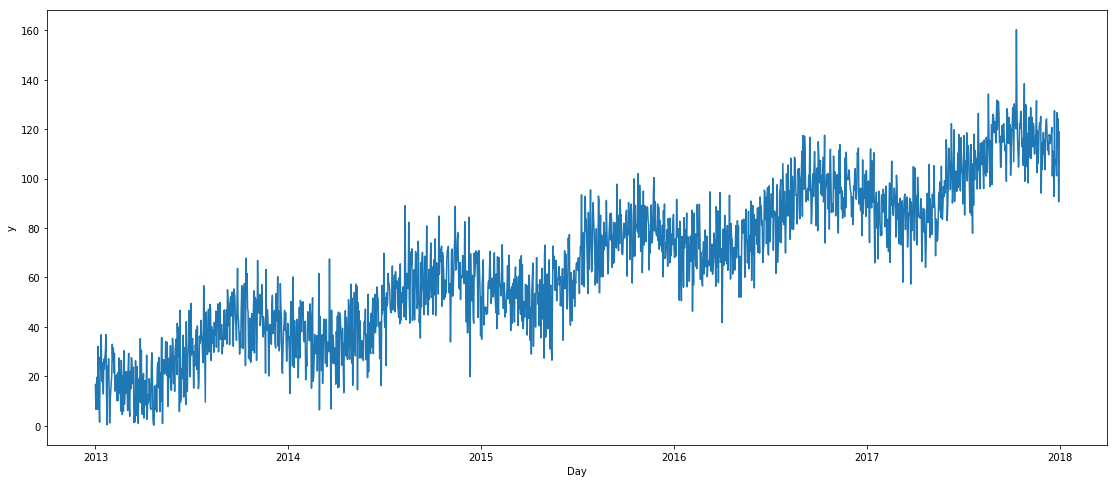

In [3]:
plt.figure(figsize=(19,8))
plt.plot(data['y'])
plt.ylabel('y')
plt.xlabel('Day')
plt.show()

In [4]:
#Split data into training and test set, cut by a date
train = data.loc[data.index < '2017-01-01']
test = data.loc[data.index > '2017-01-01']

In [5]:
train.head()

,y
date,
2013-01-01,16.650798
2013-01-02,6.651429
2013-01-03,16.537404
2013-01-04,19.662590
2013-01-05,6.632995


In [6]:
# Monthly cycle during the year 
df_year = pd.DataFrame({"y": train['y'].resample("M").sum()})
df_year['m_avg'] = df_year.y.rolling(center=True, window=12).mean()
df_year.head(20)

,y,m_avg
date,,
2013-01-31,573.380450,NaN
2013-02-28,527.714935,NaN
2013-03-31,466.634457,NaN
2013-04-30,397.257325,NaN
2013-05-31,696.166346,NaN
2013-06-30,799.167200,NaN
2013-07-31,1008.446020,905.527941
2013-08-31,1181.793629,953.941605
2013-09-30,1344.920736,990.767091


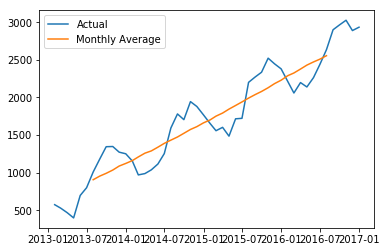

In [7]:
plt.plot(df_year['y'], label='Actual')
plt.plot(df_year['m_avg'], label='Monthly Average')
plt.legend(loc='best')
plt.show()

In [8]:
df_year['sr'] = df_year['y'] / df_year['m_avg']

# Add month numbers
df_year['month'] = df_year.index.month
print(df_year.head(20))
# Extract all January data for example
df_ = df_year.loc[df_year['month']==1]
df_

                      y        m_avg        sr  month
date                                                 
2013-01-31   573.380450          NaN       NaN      1
2013-02-28   527.714935          NaN       NaN      2
2013-03-31   466.634457          NaN       NaN      3
2013-04-30   397.257325          NaN       NaN      4
2013-05-31   696.166346          NaN       NaN      5
2013-06-30   799.167200          NaN       NaN      6
2013-07-31  1008.446020   905.527941  1.113655      7
2013-08-31  1181.793629   953.941605  1.238853      8
2013-09-30  1344.920736   990.767091  1.357454      9
2013-10-31  1347.546319  1034.151085  1.303046     10
2013-11-30  1272.375218  1087.440423  1.170064     11
2013-12-31  1250.932662  1122.298389  1.114617     12
2014-01-31  1154.344409  1160.131032  0.995012      1
2014-02-28   969.620765  1208.937765  0.802044      2
2014-03-31   987.242385  1258.872613  0.784227      3
2014-04-30  1036.729389  1288.876183  0.804367      4
2014-05-31  1114.461935  133

,y,m_avg,sr,month
date,,,,
2013-01-31,573.380450,NaN,NaN,1
2014-01-31,1154.344409,1160.131032,0.995012,1
2015-01-31,1654.827521,1701.153082,0.972768,1
2016-01-31,2214.121895,2289.797473,0.966951,1


In [9]:
# Average each month 
df_ = df_year.groupby('month').agg({
        'sr': 'mean'})
df_.reset_index(inplace=True)
#print(df_.head(20))
df_.columns = ['month', 'usi']
#print(df_.head(20))
# Combine with main data frame
df_year = pd.merge(df_year, df_, on='month', right_index=True).sort_index()
df_year.head(20)

,y,m_avg,sr,month,usi
date,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244
2013-02-28,527.714935,NaN,NaN,2,0.858922
2013-03-31,466.634457,NaN,NaN,3,0.867474
2013-04-30,397.257325,NaN,NaN,4,0.829878
2013-05-31,696.166346,NaN,NaN,5,0.884812
2013-06-30,799.167200,NaN,NaN,6,0.920539
2013-07-31,1008.446020,905.527941,1.113655,7,1.090794
2013-08-31,1181.793629,953.941605,1.238853,8,1.187310
2013-09-30,1344.920736,990.767091,1.357454,9,1.199914


In [10]:
df_year['asi'] = df_['usi'].mean() * df_year['usi']
df_year['y_t-s'] = df_year['y'] / df_year['asi'] #- De-seasonalized
df_year

,y,m_avg,sr,month,usi,asi,y_t-s
date,,,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244,1.002169,572.139436
2013-02-28,527.714935,NaN,NaN,2,0.858922,0.879929,599.724526
2013-03-31,466.634457,NaN,NaN,3,0.867474,0.888690,525.081157
2013-04-30,397.257325,NaN,NaN,4,0.829878,0.850175,467.265296
2013-05-31,696.166346,NaN,NaN,5,0.884812,0.906452,768.012088
2013-06-30,799.167200,NaN,NaN,6,0.920539,0.943053,847.425714
2013-07-31,1008.446020,905.527941,1.113655,7,1.090794,1.117472,902.435412
2013-08-31,1181.793629,953.941605,1.238853,8,1.187310,1.216348,971.591471
2013-09-30,1344.920736,990.767091,1.357454,9,1.199914,1.229261,1094.088739


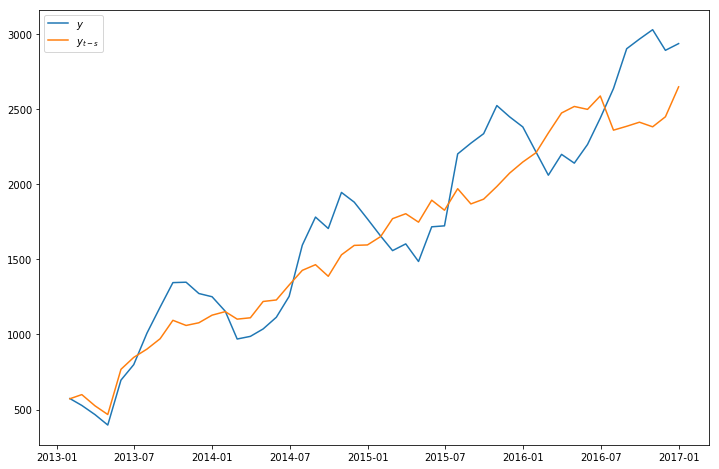

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df_year['y'], label='$y$')
plt.plot(df_year['y_t-s'], label='$y_{t-s}$')
plt.legend(loc='best')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=False, fit_intercept=True)
y_t_s = np.atleast_2d(df_year['y_t-s'].values).T
x = np.atleast_2d(np.linspace(0, len(df_year) - 1, len(df_year))).T
lm.fit(x, y_t_s)
df_year['trend'] = lm.predict(x)

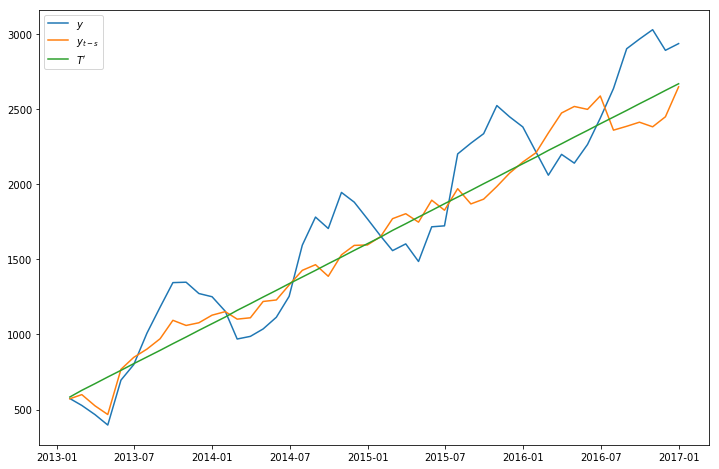

In [13]:
# Plot actual data, de-seasonalized data, and the trend
plt.figure(figsize=(12,8))
plt.plot(df_year['y'], label='$y$')
plt.plot(df_year['y_t-s'], label='$y_{t-s}$')
plt.plot(df_year['trend'], label="$T'$")
plt.legend(loc='best')
plt.show()

In [14]:
#Check the test set and prediction
test_year = pd.DataFrame({"y": test.y.resample("M").sum()})
test_year['month'] = test_year.index.month

# get index for trend regression
x_test = np.linspace(len(df_year), len(df_year) + 
                     len(test_year) - 1,
                    len(test_year)).reshape(-1,1)
df_test = pd.merge(test_year, df_year[['month', 'asi']], 
                   on='month', 
                   right_index=True).sort_index().drop_duplicates()
#df_test['trend'] = lm.predict(x_test)
#df_test['forecast'] = df_test['asi'] * df_test['trend']
#df_test

In [15]:
df_test

,y,month,asi
date,,,
2017-01-31,2666.945899,1,1.002169
2017-02-28,2458.970713,2,0.879929
2017-03-31,2589.872089,3,0.888690
2017-04-30,2563.687815,4,0.850175
2017-05-31,2797.599595,5,0.906452
2017-06-30,3073.134071,6,0.943053
2017-07-31,3191.893059,7,1.117472
2017-08-31,3473.627714,8,1.216348
2017-09-30,3516.377677,9,1.229261


In [16]:
#- forecast: asi* trend
df_test['trend'] = lm.predict(x_test)
df_test['forecast'] = df_test['asi'] * df_test['trend']
df_test

,y,month,asi,trend,forecast
date,,,,,
2017-01-31,2666.945899,1,1.002169,2712.466680,2718.350229
2017-02-28,2458.970713,2,0.879929,2756.812019,2425.798533
2017-03-31,2589.872089,3,0.888690,2801.157358,2489.360981
2017-04-30,2563.687815,4,0.850175,2845.502697,2419.175572
2017-05-31,2797.599595,5,0.906452,2889.848036,2619.509484
2017-06-30,3073.134071,6,0.943053,2934.193375,2767.099304
2017-07-31,3191.893059,7,1.117472,2978.538714,3328.432675
2017-08-31,3473.627714,8,1.216348,3022.884053,3676.879864
2017-09-30,3516.377677,9,1.229261,3067.229392,3770.425801


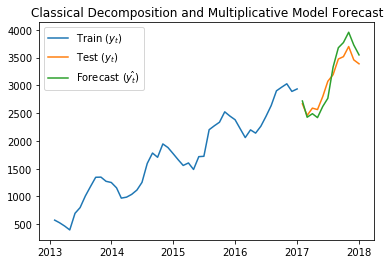

In [17]:
plt.plot(df_year['y'], label='Train ($y_t$)')
plt.plot(df_test['y'], label='Test ($y_t$)')
plt.plot(df_test['forecast'], label='Forecast ($\hat{y_t}$)')
plt.legend(loc='best')
plt.title("Classical Decomposition and Multiplicative Model Forecast")
plt.show()

In [18]:
evaluation = df_test.copy()
evaluation['error'] = evaluation['y'] - evaluation['forecast']
evaluation.insert(0, 'series', 1) # insert value to groupby
evaluation.groupby('series').agg({
        'y' : 'sum',
        'forecast' : 'sum',
        'error': {
            'total_error' : 'sum',
            'percentage_error' : lambda x: 100 * np.sum(x) / np.sum(evaluation['y']),
            'mae': lambda x: np.mean(np.abs(x)),
            'rmse': lambda x: np.sqrt(np.mean(x ** 2)),
            'mape': lambda x: 100 * np.sum(np.abs(x)) / np.sum(evaluation['y'])
        }}).apply(np.round, axis=1)

y forecast       error                                    
            sum      sum total_error percentage_error    mae   rmse mape
series                                                                  
1       36877.0  37445.0      -568.0             -2.0  174.0  193.0  6.0